In [1]:
import pandas as pd
import numpy as np

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset
CreditRiskData=pd.read_csv('CreditRiskData.csv', encoding='latin')

In [3]:
print('Shape before deleting duplicate values:', CreditRiskData.shape)

Shape before deleting duplicate values: (1000, 21)


In [4]:
# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

Shape After deleting duplicate values: (1000, 21)


In [5]:
# Printing sample data to Quantitative/Categorical/Qualitative variables
CreditRiskData.head(10)

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


The goal is to develop a supervised ML classification model to predict whether to approve a loan application. The target variable, GoodCredit, represents whether the loan decision was good (GoodCredit=1) or bad (GoodCredit=0). The predictors include features such as duration, history, purpose, amount, savings, etc. By building this predictive model, we aim to make informed decisions on loan approvals based on the provided features and historical loan outcomes.

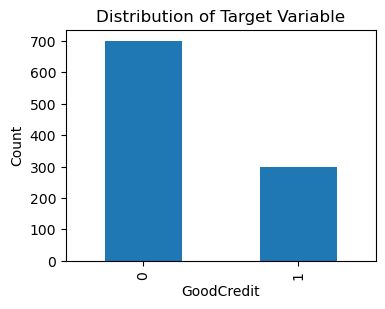

In [6]:
import matplotlib.pyplot as plt

# Create a bar chart for the categorical target variable
grouped_data = CreditRiskData['GoodCredit'].value_counts()
grouped_data.plot(kind='bar', figsize=(4, 3))
plt.xlabel('GoodCredit')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

Confirming that the target variable's distribution is not heavily skewed for effective predictive modeling. Ideally, a bell curve distribution is desirable, but slightly positive or negative skew is also acceptable. 

In [7]:
# Observe the summarized information of the data
# Check data types and identify missing values based on the number of non-null values vs total rows
# Remove variables with more than 30% missing values
# Exclude qualitative variables that cannot be used in Machine Learning

# Summarize data
data_summary = CreditRiskData.info()

# Identify missing values
missing_values = CreditRiskData.isnull().sum()

# Remove variables with more than 30% missing values
missing_threshold = len(CreditRiskData) * 0.3
filtered_data = CreditRiskData.dropna(thresh=missing_threshold, axis=1)

# Exclude qualitative variables that cannot be used in Machine Learning
filtered_data = filtered_data.select_dtypes(exclude=['object'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [8]:
# Displaying descriptive statistics for the dataset
CreditRiskData.describe(include='all')

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,...,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [9]:
# Determine if each column is categorical or continuous by finding the number of unique values
unique_values_per_column = CreditRiskData.nunique()

# Display the number of unique values for each column
print(unique_values_per_column)

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64


NB - 
If the number of unique values is small (e.g., less than 20), the column is likely categorical.
If the number of unique values is large (e.g., more than 20), the column is likely continuous or ordinal, hence - 

    checkingstatus: Selected. Categorical
    duration: Selected. Continuous
    history: Selected. Categorical
    purpose: Selected. Categorical
    amount: Selected. Continuous
    savings: Selected. Categorical
    employ: Selected. Categorical
    installment: Selected. Categorical
    status: Selected. Categorical
    others: Selected. Categorical
    residence: Selected. Categorical
    property: Selected. Categorical
    age: Selected. Continuous
    otherplans: Selected. Categorical
    housing: Selected. Categorical
    cards: Selected. Categorical
    job: Selected. Categorical
    liable: Selected. Categorical
    tele: Selected. Categorical
    foreign: Selected. Categorical

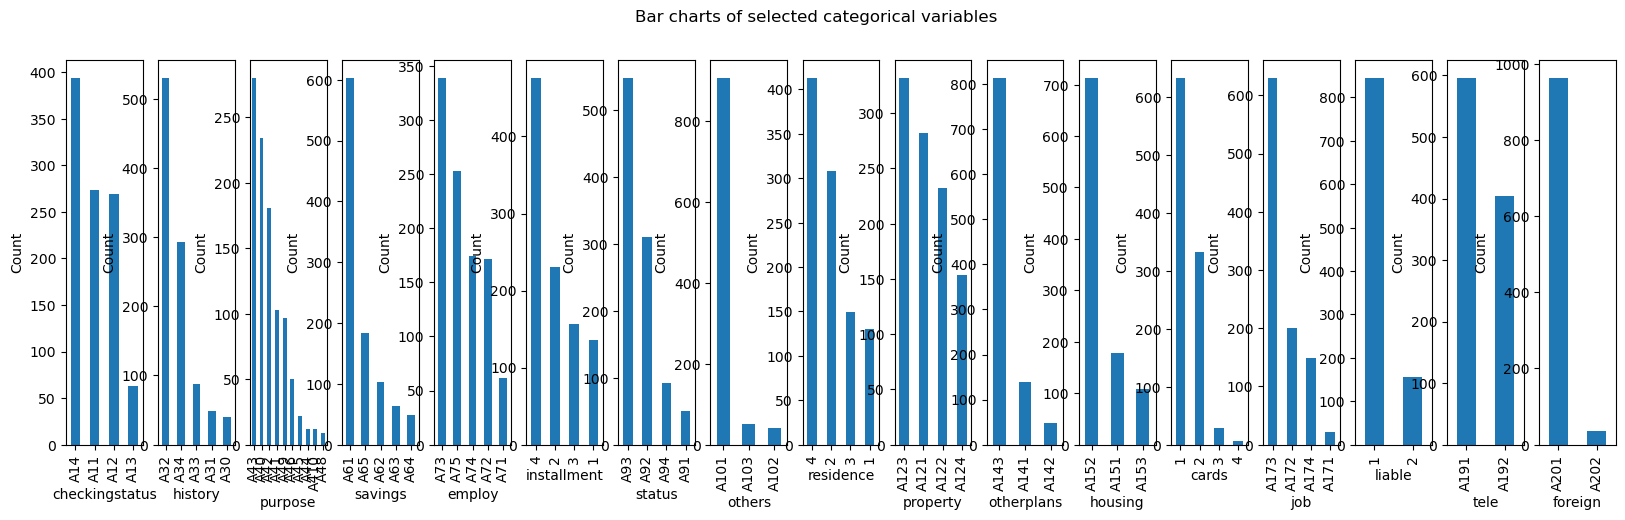

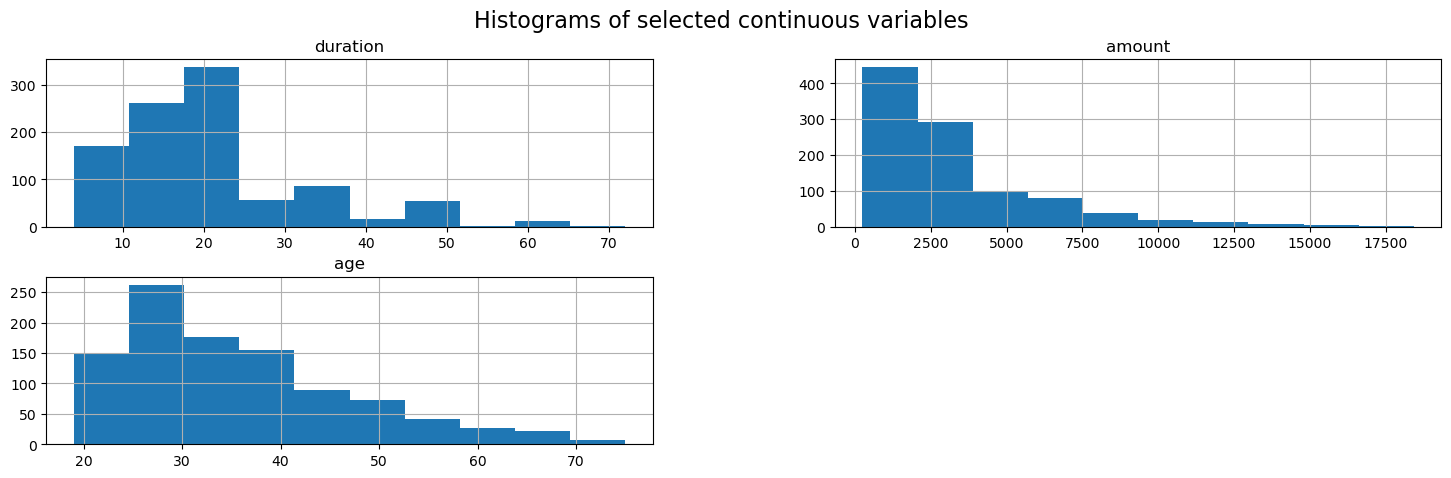

In [10]:
#Visualizing distribution of all the Categorical and continous Predictors

def plot_bar_charts(data, columns):
    """
    Plot multiple bar charts for selected categorical variables.

    Parameters:
        data (DataFrame): Input data containing the selected variables.
        columns (list): List of column names to plot.

    Returns:
        None (Displays the bar charts).
    """
    %matplotlib inline

    # Generating multiple subplots
    num_cols = len(columns)
    fig, sub_plots = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))
    fig.suptitle('Bar charts of selected categorical variables')

    for col_name, plot_number in zip(columns, range(num_cols)):
        data[col_name].value_counts().plot(kind='bar', ax=sub_plots[plot_number])
        sub_plots[plot_number].set_xlabel(col_name)
        sub_plots[plot_number].set_ylabel('Count')

# List of selected categorical variables
selected_categorical = ['checkingstatus', 'history', 'purpose', 'savings', 'employ', 'installment', 
                        'status', 'others', 'residence', 'property', 'otherplans', 'housing', 
                        'cards', 'job', 'liable', 'tele', 'foreign']

# List of selected continuous variables (not included in bar charts)
selected_continuous = ['duration', 'amount', 'age']

# Calling the function for selected categorical variables
plot_bar_charts(data=CreditRiskData, columns=selected_categorical)

# Plotting histograms for selected continuous variables
CreditRiskData.hist(selected_continuous, figsize=(18, 5))

# Adding titles to the continuous variable histograms
plt.suptitle('Histograms of selected continuous variables', fontsize=16)
plt.show()


Categorical Predictor variables

    In machine learning algorithms, bar charts visually represent the frequency distribution of categorical variables, offering valuable insights into the data. They help identify class imbalances, understand feature importance for classification tasks, assess data quality, and aid in feature selection. Notably, all categorical columns, except "foreign" and "others," exhibit satisfactory distributions for machine learning, highlighting the importance of balanced data for effective model training and prediction.

Continuous Predictor variables

    Histograms are visual representations of the distribution of a single continuous variable. The preferred outcome is a bell-shaped or slightly skewed bell-shaped curve, indicating a normal distribution. Age, Amount and duration are acceptable from th plot.

Missing values Treatment

In [11]:
CreditRiskData.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

No missing data

Feature selection

    This process involves selecting the most relevant columns (features) that are correlated with the target variable. To achieve this, we can use methods like measuring correlation values or conducting ANOVA/Chi-Square tests. These techniques help identify the columns that have a significant impact on predicting the target variable, ensuring the creation of an effective predictive model.
    






Visualizing relation


Categorical Vs Continuous

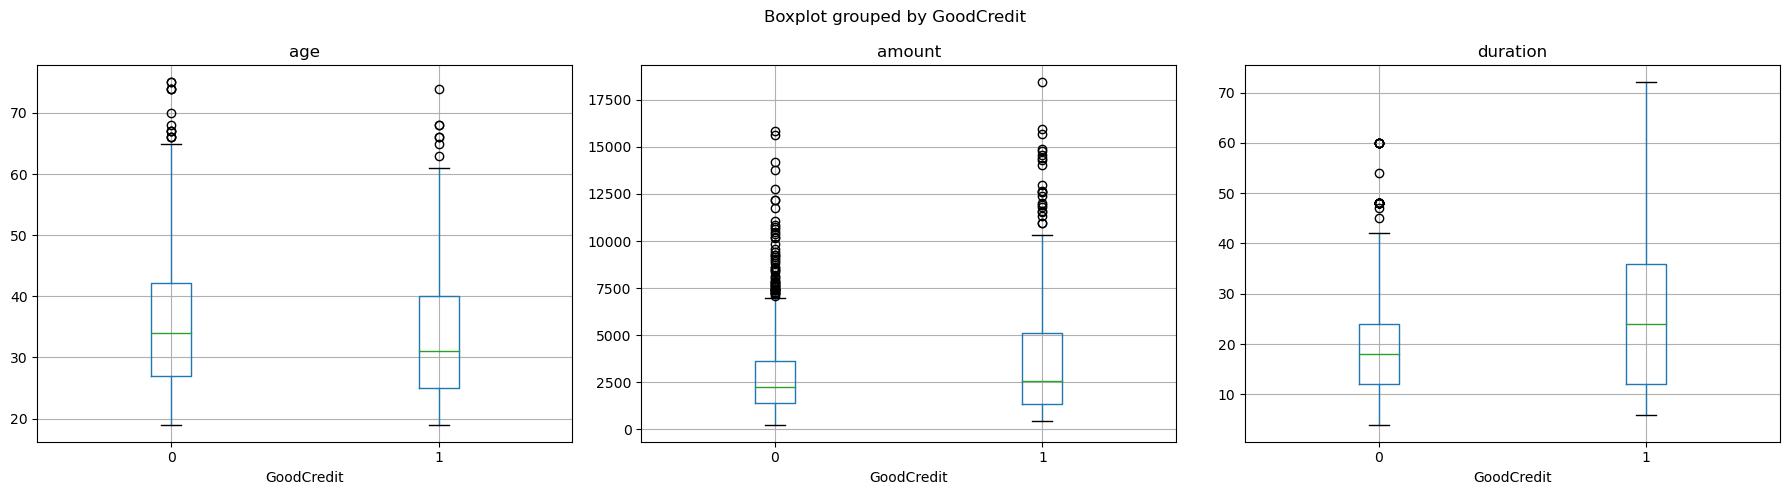

In [12]:
# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
ContinuousColsList = ['age', 'amount', 'duration']
fig, ax = plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18, 5))

for i, predictor_col in enumerate(ContinuousColsList):
    CreditRiskData.boxplot(column=predictor_col, by='GoodCredit', figsize=(5, 5), vert=True, ax=ax[i])
    
plt.tight_layout()
plt.show()

In the first chart comparing "age" with "GoodCredit," both the boxes align closely, indicating that the age of applicants whose loans were rejected or approved is similar. Therefore, age does not seem to have a correlation with GoodCredit, making it a non-discriminating factor for loan approval. Conversely, the second and third charts display contrasting characteristics, suggesting that "amount" and "duration" are correlated with the target variable. To validate this observation, we can further examine the results of the ANOVA test.

ANOVA (Analysis of Variance) test for Statistical Feature Selection (Categorical vs. Continuous)

In [13]:
from scipy.stats import f_oneway
def function_anova(data, target_var, continuous_predictor_list):
    """
    Finds the statistical relationship between the target variable and continuous predictors using ANOVA.
    
    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        target_var (str): The name of the target variable (categorical).
        continuous_predictor_list (list): List of column names representing continuous predictors.
    
    Returns:
        list: A list of continuous predictors that are correlated with the target variable.
    """
    # Creating an empty list of final selected predictors
    selected_predictors = []
    
    print('##### ANOVA Results ##### \n')
    for predictor in continuous_predictor_list:
        category_group_lists = data.groupby(target_var)[predictor].apply(list)
        anova_results = f_oneway(*category_group_lists)
        
        # If the ANOVA P-Value is < 0.05, that means we reject H0
        if (anova_results[1] < 0.05):
            print(predictor, 'is correlated with', target_var, '| P-Value:', anova_results[1])
            selected_predictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', target_var, '| P-Value:', anova_results[1])
    
    return selected_predictors

In [14]:
# List of continuous columns and the categorical target variable
continuous_variables = ['age', 'amount', 'duration']
target_variable = 'GoodCredit'

# Calling the function to find correlated continuous predictors
selected_continuous_predictors = function_anova(data=CreditRiskData, 
                                               target_var=target_variable, 
                                               continuous_predictor_list=continuous_variables)

# Print the list of continuous predictors correlated with the target variable
print('\nContinuous Predictors Correlated with Target Variable:', selected_continuous_predictors)

##### ANOVA Results ##### 

age is correlated with GoodCredit | P-Value: 0.003925339398278295
amount is correlated with GoodCredit | P-Value: 8.797572373533373e-07
duration is correlated with GoodCredit | P-Value: 6.488049877187189e-12

Continuous Predictors Correlated with Target Variable: ['age', 'amount', 'duration']


Categorical Vs Categorical

 we explore the correlation between them visually using barplots and statistically using Chi-square test.

In [15]:
CrossTabResult = pd.crosstab(index=CreditRiskData['checkingstatus'], columns=CreditRiskData['GoodCredit'])
CrossTabResult

GoodCredit,0,1
checkingstatus,,
A11,139,135
A12,164,105
A13,49,14
A14,348,46


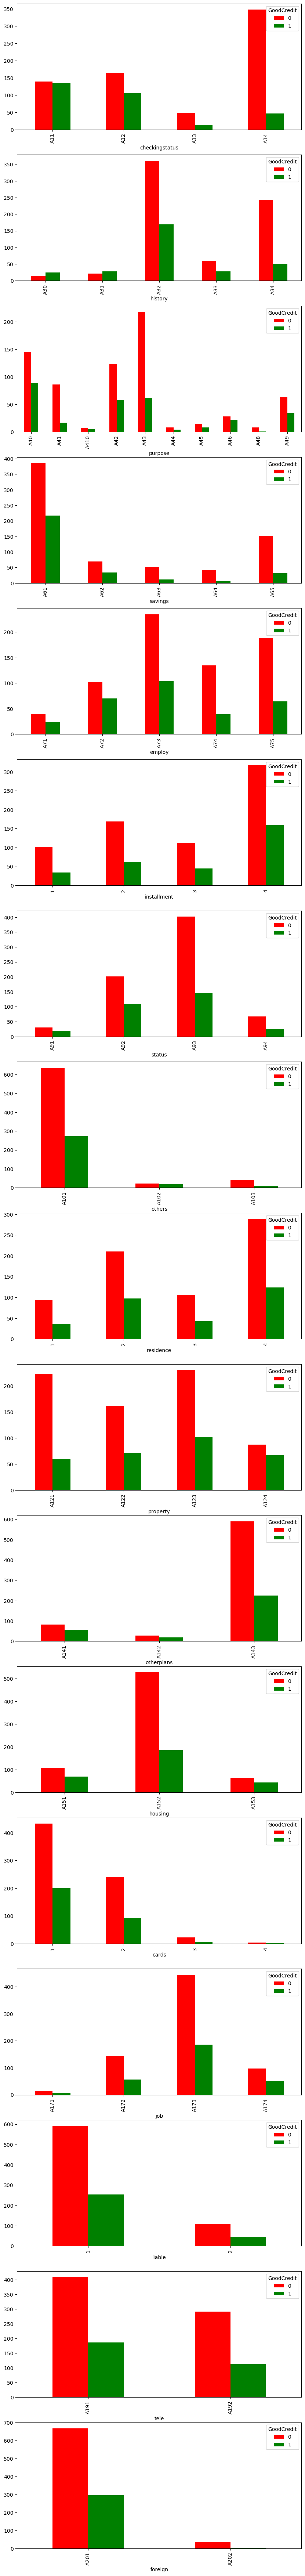

In [16]:
# Visual Inference using Grouped Bar Charts
CategoricalColsList = ['checkingstatus', 'history', 'purpose', 'savings', 'employ',
                       'installment', 'status', 'others', 'residence', 'property',
                       'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

fig, axes = plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10, 90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol, ax in zip(CategoricalColsList, axes):
    CrossTabResult = pd.crosstab(index=CreditRiskData[CategoricalCol], columns=CreditRiskData['GoodCredit'])
    CrossTabResult.plot.bar(color=['red', 'green'], ax=ax)

plt.show()

If the ratio of bars is consistent across all categories, it indicates a lack of correlation between the two columns. For instance, in the "tele" vs "GoodCredit" plot, the 0 vs 1 ratio for category A191 is similar to A192, implying that the variable "tele" does not significantly impact Good/Bad Credit. Conversely, in the "history" vs "GoodCredit" plot, a notable difference in the number of Bad Credits occurs for categories A32 and A34, suggesting a correlation between the "history" and "GoodCredit" variables. To validate this analysis, we will conduct Chi-Square Tests in the subsequent section

In [17]:
# Function to find the correlation of all categorical variables with the Target variable
def find_correlated_predictors(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list to store final selected predictors
    selected_predictors = []

    for predictor in CategoricalVariablesList:
        cross_tab_result = pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        chi2_result, p_value, _, _ = chi2_contingency(cross_tab_result)
        
        # If the Chi-Square P-Value is less than 0.05, we reject the null hypothesis
        if p_value < 0.05:
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', p_value)
            selected_predictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', p_value)        
            
    return selected_predictors

# List of categorical variables to be analyzed
categorical_variables = ['checkingstatus', 'history', 'purpose', 'savings', 'employ',
                         'installment', 'status', 'others', 'residence', 'property',
                         'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

# Calling the function
selected_categorical_predictors = find_correlated_predictors(inpData=CreditRiskData, 
                                                              TargetVariable='GoodCredit',
                                                              CategoricalVariablesList=categorical_variables)


checkingstatus is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
history is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
purpose is correlated with GoodCredit | P-Value: 0.00011574910079691586
savings is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
employ is correlated with GoodCredit | P-Value: 0.0010454523491402541
installment is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
status is correlated with GoodCredit | P-Value: 0.02223800546926877
others is correlated with GoodCredit | P-Value: 0.036055954027247226
residence is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
property is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
otherplans is correlated with GoodCredit | P-Value: 0.0016293178186473534
housing is correlated with GoodCredit | P-Value: 0.00011167465374597684
cards is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
job is NOT correlated with GoodCredit | P-Value: 0.59658159

In [18]:
# Selected columns for machine learning
selected_columns = ['checkingstatus', 'history', 'purpose', 'savings', 'employ',
                    'status', 'others', 'property', 'otherplans', 'housing', 'foreign',
                    'age', 'amount', 'duration']

# Creating a new DataFrame with only the selected columns
data_for_ml = CreditRiskData[selected_columns]
data_for_ml.head()


,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


# Data Preprocessing for ML
To prepare the data for machine learning, the following data transformations will be performed:

1. Converting Ordinal Categorical Columns to Numeric: Ordinal categorical variables will be mapped to numeric values based on their order of importance.

2. Converting Binary Nominal Categorical Columns to Numeric: Binary nominal categorical variables will be converted using a 1/0 mapping, where one category will be represented as 1 and the other as 0.

3. Converting Other Nominal Categorical Columns to Numeric: For non-binary nominal categorical columns, we will use the `pd.get_dummies()` function to create binary columns for each category.

4. Data Transformation (Optional): If needed, we can apply standardization, normalization, logarithmic, or square root transformations to the numeric data to bring them within a similar scale or to handle skewed distributions.

In [19]:
# Mapping ordinal variable "employ" to numerical values
employ_mapping = {'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}
data_for_ml['employ'] = data_for_ml['employ'].map(employ_mapping)

In [20]:
# Treating the binary nominal variable 'foreign'
data_for_ml['foreign'] = data_for_ml['foreign'].replace({'A201': 1, 'A202': 0})

# Displaying data after the nominal treatment
data_for_ml.head()


,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1,67,1169,6
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1,22,5951,48
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1,49,2096,12
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1,45,7882,42
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1,53,4870,24


In [21]:
# Treating all the nominal variables at once using dummy variables
data_for_ml_numeric = pd.get_dummies(data_for_ml)

# Adding Target Variable to the data
data_for_ml_numeric['GoodCredit'] = CreditRiskData['GoodCredit']

# Printing sample rows
data_for_ml_numeric.head()


,employ,foreign,age,amount,duration,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,GoodCredit
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [22]:
# Separate Target Variable and Predictor Variables
target_variable = 'GoodCredit'
predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

In [23]:
X=data_for_ml_numeric[predictors].values
y=data_for_ml_numeric[target_variable].values

# Normalization of data

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# On this data, Min-Max normalization produced better results
PredictorScaler = MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)

# Generating the normalized values of X
X = PredictorScalerFit.transform(X)

# Validation Split 

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data

In [26]:
train_data_size = X_train.shape[0]
train_labels_size = y_train.shape[0]
test_data_size = X_test.shape[0]
test_labels_size = y_test.shape[0]

print(f"Training Data: {train_data_size} samples")
print(f"Training Labels: {train_labels_size} samples")
print(f"Testing Data: {test_data_size} samples")
print(f"Testing Labels: {test_labels_size} samples")

Training Data: 700 samples
Training Labels: 700 samples
Testing Data: 300 samples
Testing Labels: 300 samples


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model with chosen parameters
clf = LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Train the model on the Training Data
LOG = clf.fit(X_train, y_train)
prediction = LOG.predict(X_test)
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model with chosen parameters
clf = LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Train the model on the Training Data
LOG = clf.fit(X_train, y_train)
prediction = LOG.predict(X_test)

# Evaluate the model's performance on the Testing Data
from sklearn import metrics
print("Classification Report:")
print(metrics.classification_report(y_test, prediction))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, prediction))

# Calculate the Overall Accuracy of the model on Testing Sample Data
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Import cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Perform 10-Fold Cross Validation on the model
# Passing the full data X and y as the function will split the data into train/test folds automatically
Accuracy_Values = cross_val_score(LOG, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       209
           1       0.68      0.47      0.56        91

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300


Confusion Matrix:
[[189  20]
 [ 48  43]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.78666667 0.66403326 0.75159817 0.71776316 0.76028751 0.80460526
 0.63733333 0.77519841 0.77229833 0.7343254 ]

Final Average Accuracy of the model: 0.74


# Decision Tree

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       209
           1       0.48      0.33      0.39        91

    accuracy                           0.69       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.66      0.69      0.67       300

[[177  32]
 [ 61  30]]
Accuracy of the model on Testing Sample Data: 0.67

Accuracy values for 10-fold Cross Validation:
 [0.73734823 0.68       0.7343254  0.65257937 0.66798419 0.64715447
 0.70133333 0.72       0.71433083 0.70133333]

Final Average Accuracy of the model: 0.7


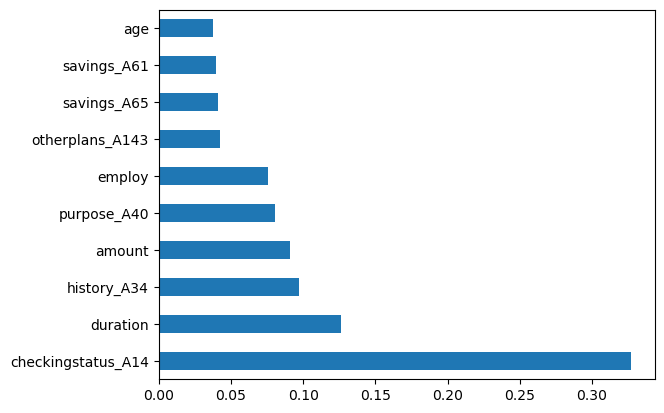

In [28]:
# Importing Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Creating the model with tunable hyperparameters
# Choose different values of max_depth and criterion for tuning the model
clf = DecisionTreeClassifier(max_depth=4, criterion='gini')

# Fitting the model on Training Data
DTree = clf.fit(X_train, y_train)
prediction = DTree.predict(X_test)

# Measuring model performance on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on the model
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(DTree, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

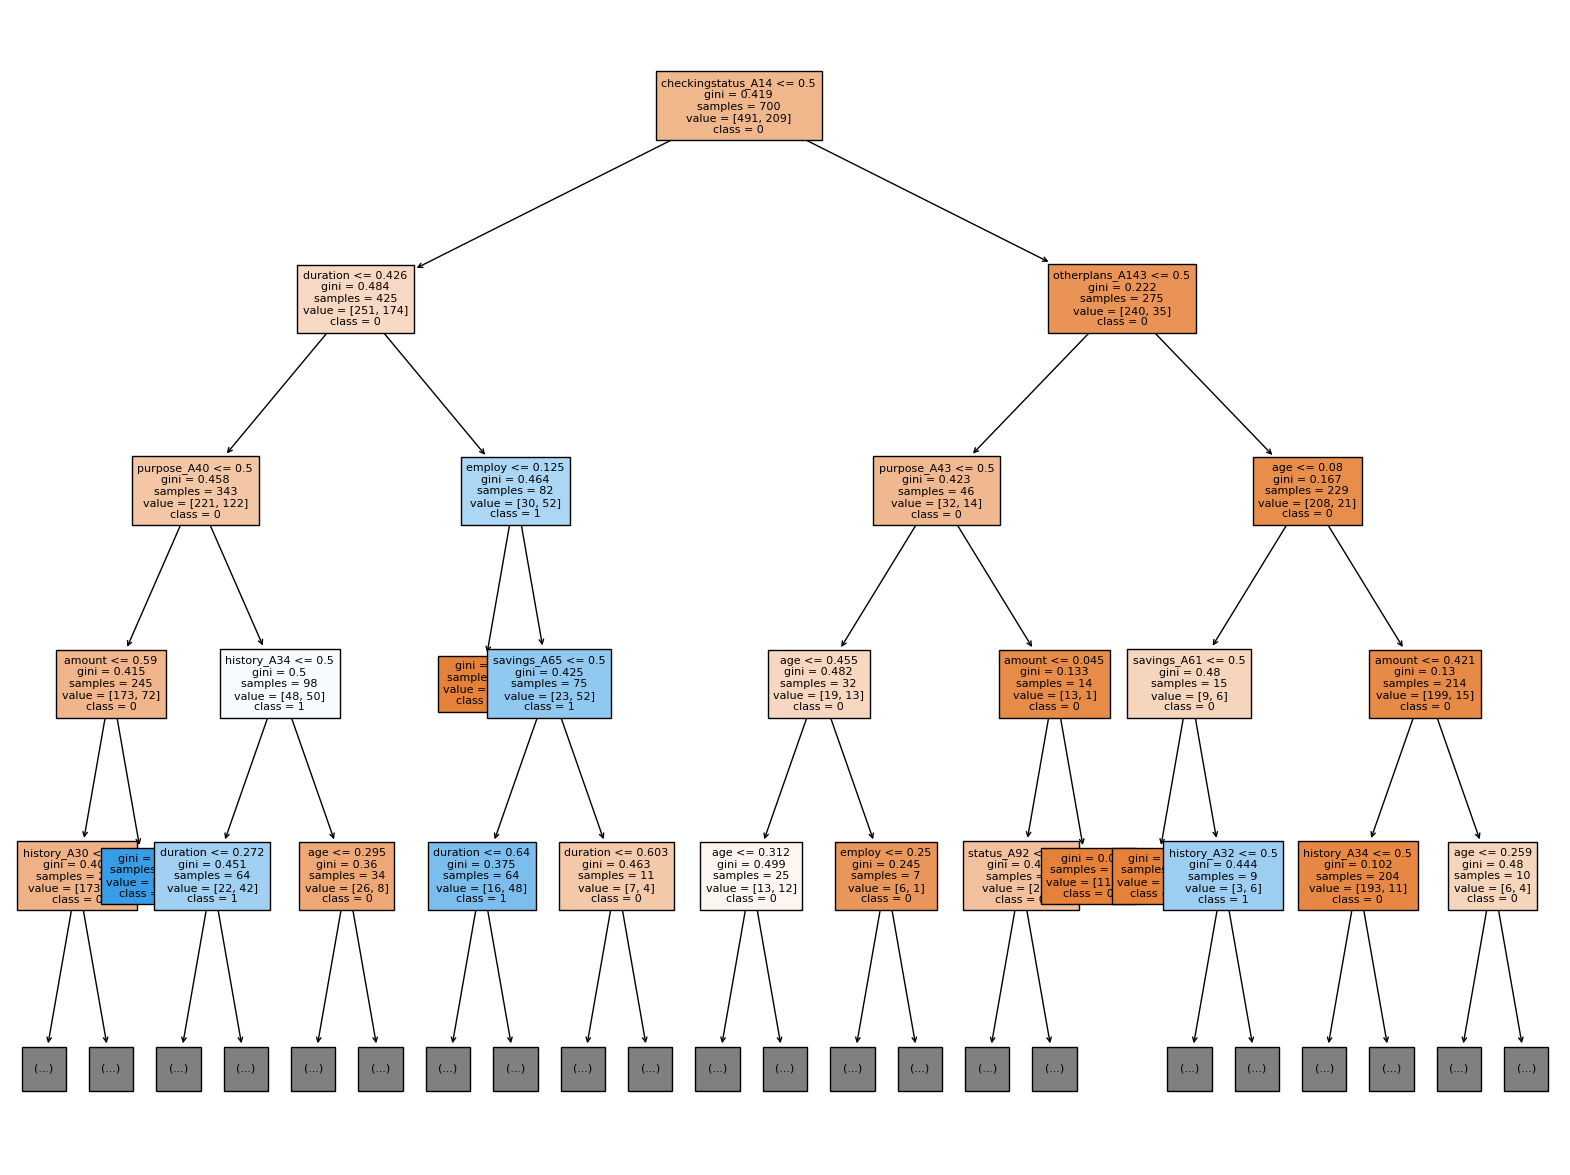

In [29]:
#plotting the 1st 3 iteation of the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Creating the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree Classifier on the training data
dt_classifier.fit(X_train, y_train)

# Getting the unique class names as strings for visualization
class_names = np.array(pd.Series(y_train).unique(), dtype=str)

# Plotting the Decision Tree for the first 4 iterations
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier, feature_names=predictors, class_names=class_names, filled=True, fontsize=8, max_depth=4)
plt.show()


# Random Forest

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       209
           1       0.75      0.33      0.46        91

    accuracy                           0.76       300
   macro avg       0.76      0.64      0.65       300
weighted avg       0.76      0.76      0.73       300

[[199  10]
 [ 61  30]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.78289474 0.75128205 0.71433083 0.69011858 0.75652174 0.66513016
 0.67594937 0.81371158 0.71225296 0.744     ]

Final Average Accuracy of the model: 0.73


<AxesSubplot:>

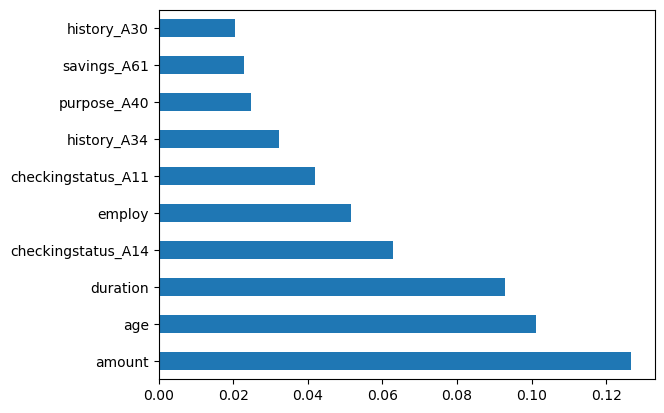

In [30]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest Classifier and tuning hyperparameters
clf = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Training the Random Forest Classifier on the training data
RF = clf.fit(X_train, y_train)
prediction = RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')


# K-Nearest Neighbor(KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN model and setting the number of neighbors to 3
clf = KNeighborsClassifier(n_neighbors=3)

# Training the KNN model on the training data
KNN = clf.fit(X_train, y_train)

# Predicting using the KNN model on the testing data
prediction = KNN.predict(X_test)

# Measuring accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the overall accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on testing sample data:', round(F1_Score, 2))

# Importing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-fold cross-validation on the KNN model
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(KNN, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       209
           1       0.61      0.48      0.54        91

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.74      0.75      0.74       300

[[181  28]
 [ 47  44]]
Accuracy of the model on testing sample data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.744      0.6508488  0.66649547 0.74604343 0.70541038 0.78289474
 0.65606469 0.67301587 0.66879756 0.7257269 ]

Final Average Accuracy of the model: 0.7


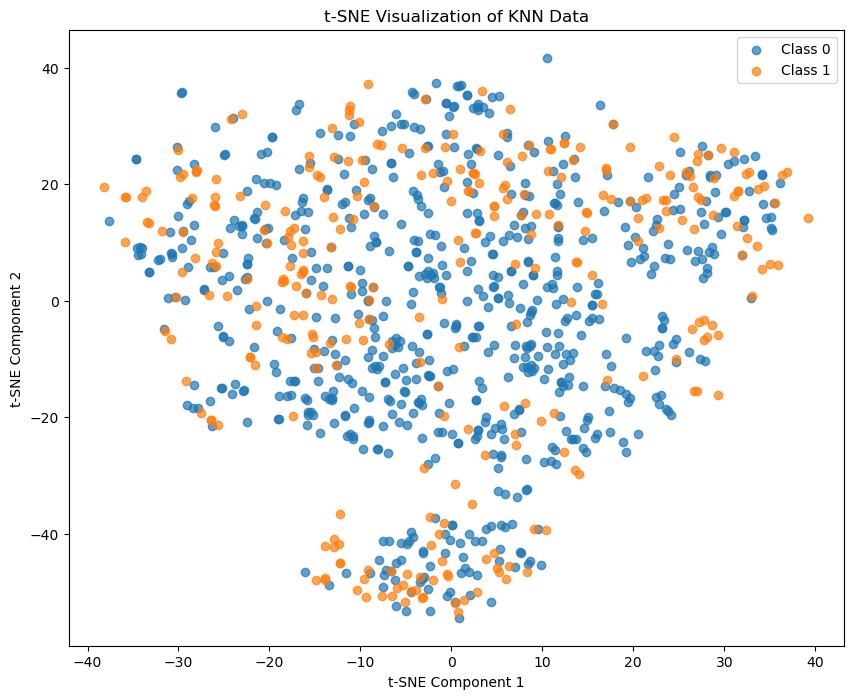

In [32]:
#Visualizing the KNN

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming you have already trained a KNN model named 'KNN' and have the features stored in 'X' and labels in 'y'

# Reduce data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting the t-SNE visualization
plt.figure(figsize=(10, 8))
for i in range(2):  # Assume 'GoodCredit' has two classes: 0 and 1
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Class {i}', alpha=0.7)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('t-SNE Visualization of KNN Data')
plt.show()

# Support Vector Machines (SVM)

In [33]:
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Creating the model on Training Data
SVM = clf.fit(X_train, y_train)
prediction = SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Importing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(SVM, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.61      0.42      0.50        91

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

[[185  24]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76987902 0.69775382 0.73089802 0.76533333 0.77229833 0.76118421
 0.70133333 0.80197664 0.79002079 0.74604343]

Final Average Accuracy of the model: 0.75


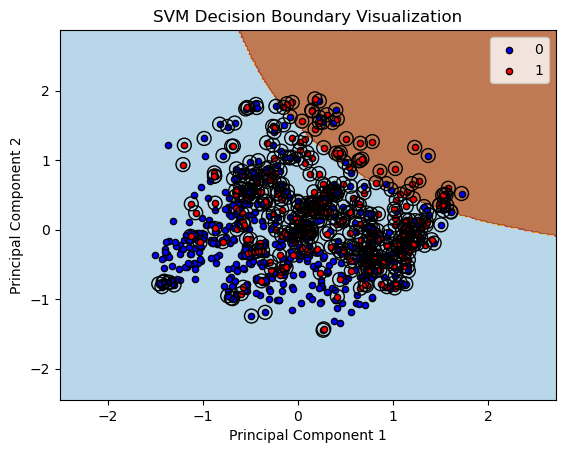

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Fit SVM on the reduced data
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)
SVM = clf.fit(X_train_pca, y_train)

# Create meshgrid to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain decision boundary
Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot training data
for i, color in zip(range(2), ['blue', 'red']):
    idx = np.where(y_train == i)
    plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], c=color, label=str(i),
                cmap=plt.cm.Paired, edgecolor='black', s=20)

# Plot support vectors
plt.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary Visualization')
plt.legend()
plt.show()


# Naive Bayes NB

In [35]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Creating the model on Training Data
NB = clf.fit(X_train, y_train)
prediction = NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Importing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(NB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


              precision    recall  f1-score   support

           0       0.85      0.72      0.78       209
           1       0.52      0.70      0.60        91

    accuracy                           0.71       300
   macro avg       0.68      0.71      0.69       300
weighted avg       0.75      0.71      0.72       300

[[150  59]
 [ 27  64]]
Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.7109375  0.51596639 0.7        0.71895121 0.76397059 0.74599729
 0.65466893 0.74430147 0.74599729 0.73833389]

Final Average Accuracy of the model: 0.7


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better convergence in the neural network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
prediction = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, prediction)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7300


# Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better convergence in the neural network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
prediction = model.predict(X_test)

# Measuring accuracy on Testing Data
print("Classification Report:")
print(classification_report(y_test, prediction))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Running 10-Fold Cross validation on the model
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(model, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       209
           1       0.55      0.58      0.57        91

    accuracy                           0.73       300
   macro avg       0.68      0.69      0.69       300
weighted avg       0.73      0.73      0.73       300


Confusion Matrix:
[[166  43]
 [ 38  53]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76635996 0.66068966 0.70857074 0.70857074 0.72       0.7343254
 0.64       0.69694026 0.77295794 0.7       ]

Final Average Accuracy of the model: 0.71


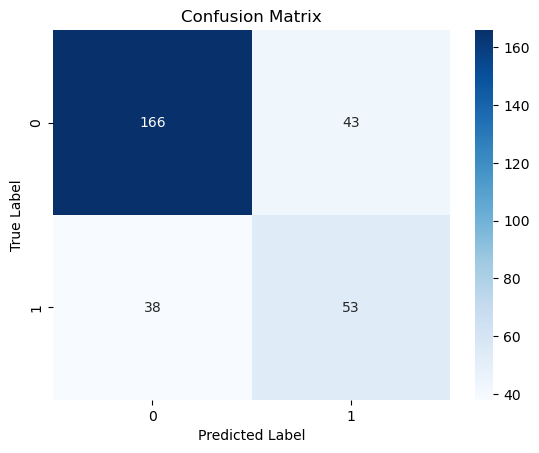

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


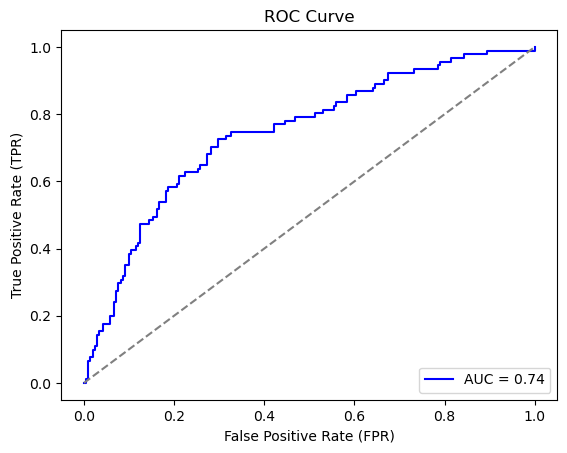

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability scores for the positive class (class 1)
probabilities = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


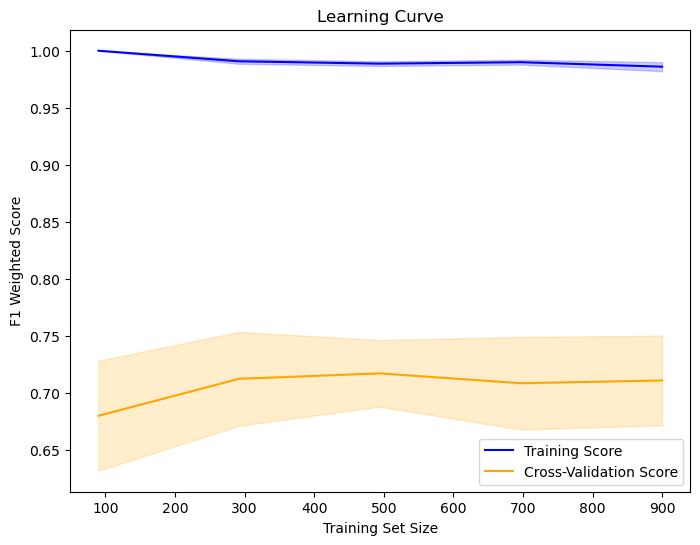

In [40]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='f1_weighted')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Weighted Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()
